In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
from sklearn import preprocessing
import seaborn as sns

In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)


#Чтобы читать файл не нужно его скачивать на компьютер.
#Можно как здесь, вытащить его из ссылки с файлом не скачавая

df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


'\nРаспределение не является нормальным.\n'

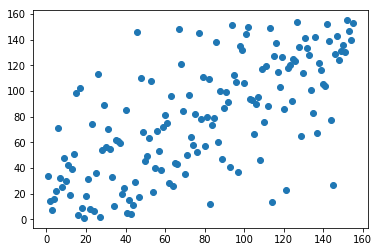

In [4]:
df.head(15)
plt.scatter(df['Positive affect'], df['Freedom'])

'''
Распределение является нормальным.
'''

In [4]:
freedom = df.Freedom.dropna() # Удалить н\а значения
print(statistics.median(df.Freedom)) # Медиана
print(df.Freedom.isnull().sum()) # Количество выбросов
print(statistics.pvariance(freedom)) # Дисперсия
print(statistics.pstdev(freedom)) # Стандартное отклонение
print(statistics.mean(freedom)) # Среднее \ математическое ожидание
print(max(freedom))
print(min(freedom))
print(max(freedom)-min(freedom)) # Размах
print(statistics.mode(freedom)) # Мода

'''
statistics.mode(freedom) выдает ошибку.
Помогите пожалуйста разобраться.
'''

71.0
1
2002.0
44.74371464239419
78.0
155.0
1.0
154.0


StatisticsError: no unique mode; found 155 equally common values

0.6817698430601656


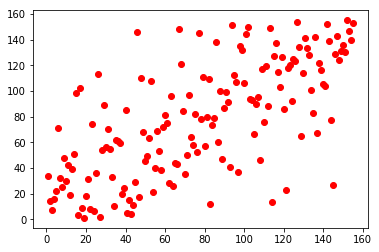

In [5]:
postive_affect = df['Positive affect'].dropna()
plt.scatter(df['Positive affect'], df['Freedom'], color = 'r')
corr, p_value = sts.pearsonr(postive_affect, freedom) # Корреляция Пирсона = corr
print(corr)
'''
Зависимость сильно выражена как по коэффициенту, так и на графике
'''

In [11]:
freedom_norm = freedom - statistics.mean(freedom)

norm = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_norm_and_centre = norm.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_norm_and_centre)) # Нормализация и масштабирование данных
print(max(freedom_norm_and_centre))

[-1.]
[1.]


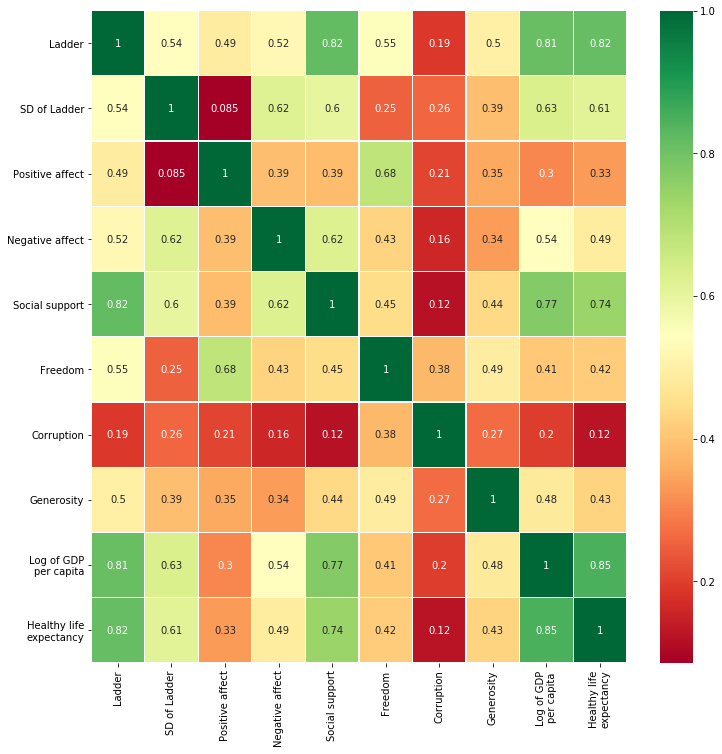

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12) # Матрица корреляции
plt.show()

In [9]:
url="http://yustiks.ru/avocado.csv"
avocado = pd.read_csv(url)
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

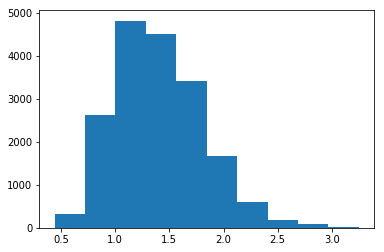

In [16]:
plt.hist(avocado['AveragePrice']) 
'''
данное распределение является нормальным
'''

-0.20831704848788477


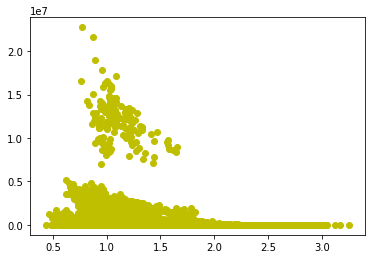

In [34]:
plt.scatter(avocado['AveragePrice'], avocado['4046'], color = 'y')
corr, p_value = sts.pearsonr(avocado['AveragePrice'], avocado['4046'])
print(corr) 
'''
Данные не связаны между собой. Это показывает как корреляция Пирсона, так и сам график.
'''